In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import google.colab
import os
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
data = pd.read_csv('HR_comma_sep.csv')

In [ ]:
features = data.columns.tolist()

In [ ]:
data.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1441,0.11,0.83,7,255,5,0,1,0,product_mng,medium
14595,0.36,0.48,2,156,3,0,1,0,accounting,high
7540,0.50,0.98,5,177,4,0,0,0,management,medium
12693,0.10,0.83,6,278,4,0,1,0,marketing,medium
7089,0.46,0.49,5,286,5,0,0,0,product_mng,low
9954,0.84,0.78,5,164,3,0,0,0,accounting,low
5817,0.57,0.62,3,154,2,0,0,0,sales,medium
9716,0.80,0.74,2,205,3,1,0,0,sales,low
6305,0.88,0.90,2,233,3,0,0,0,support,low
2214,0.59,0.52,2,149,3,0,0,0,accounting,medium


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


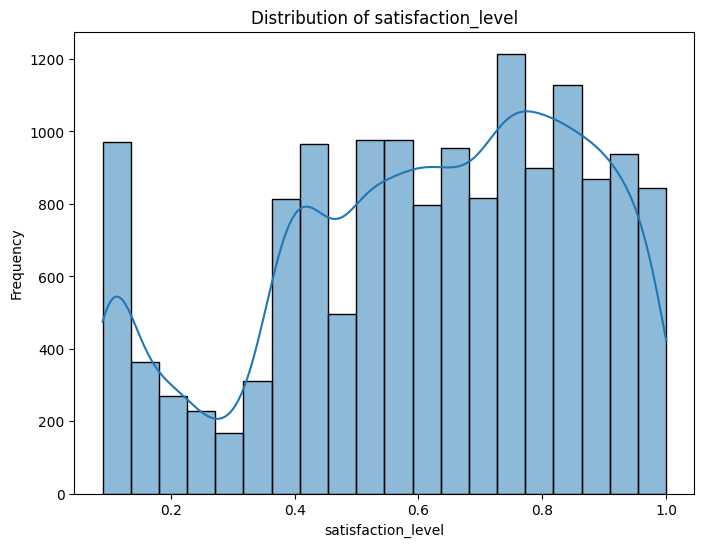

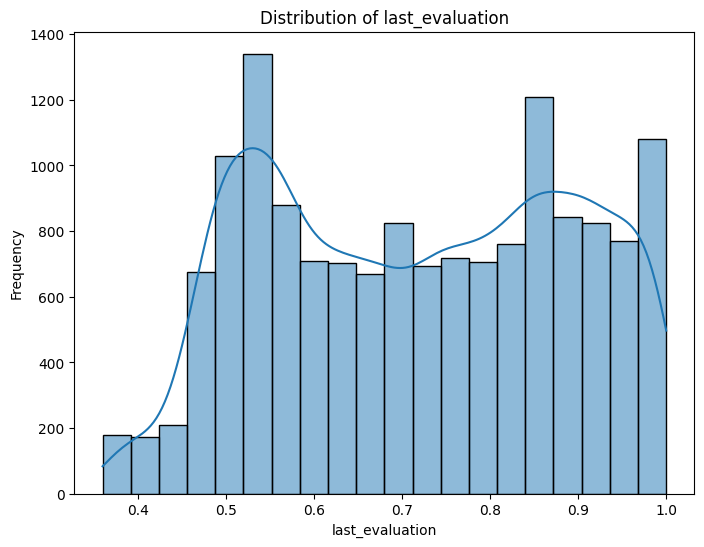

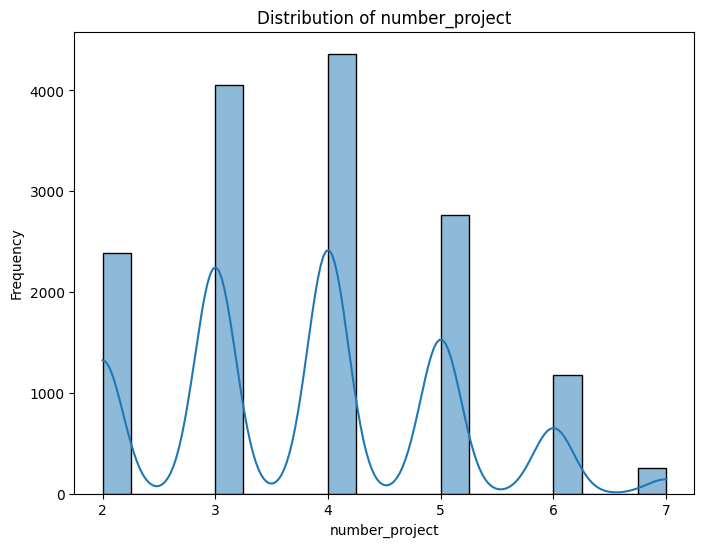

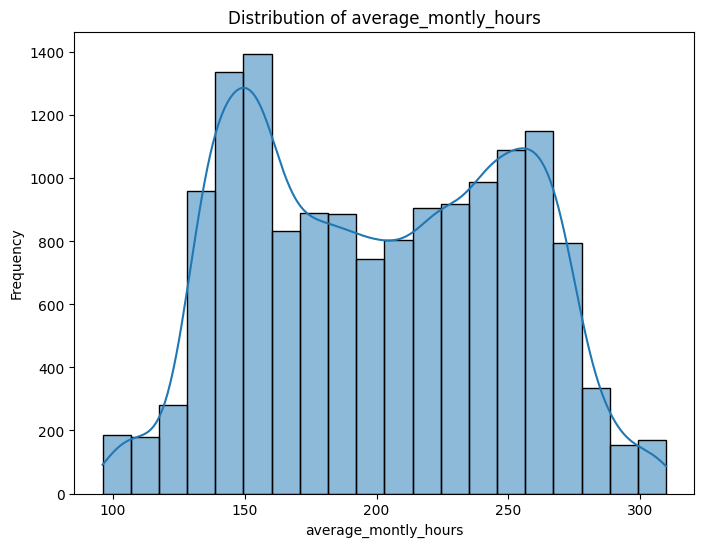

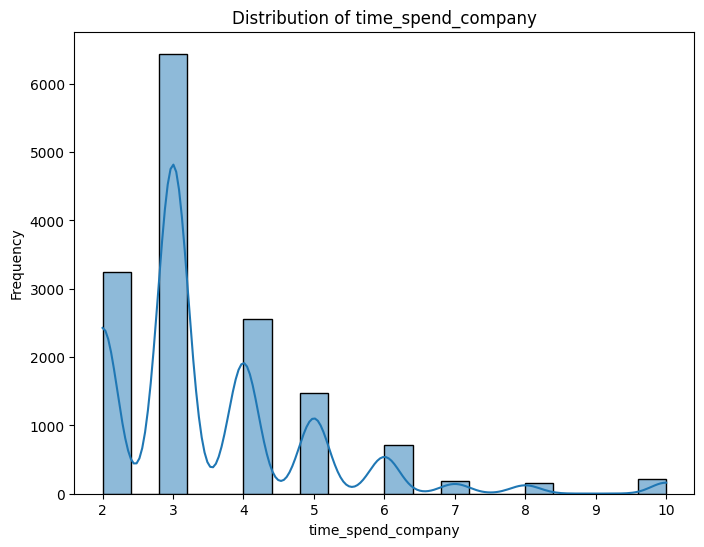

In [ ]:
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.histplot(data[feature], bins=20, kde=True)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

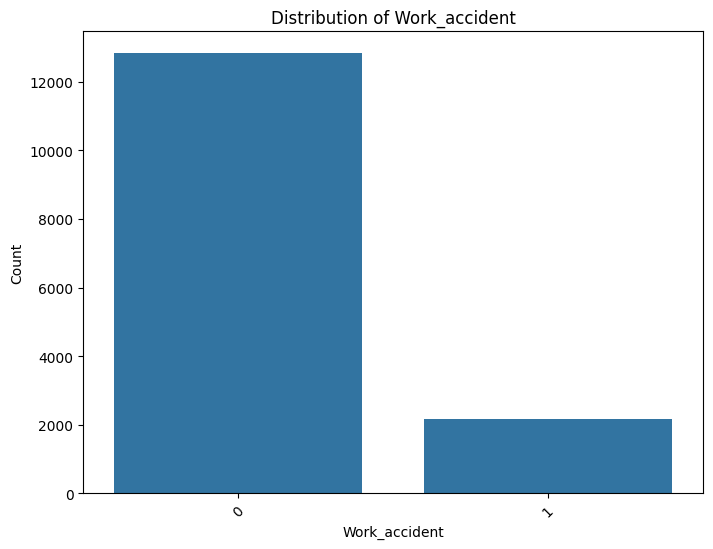

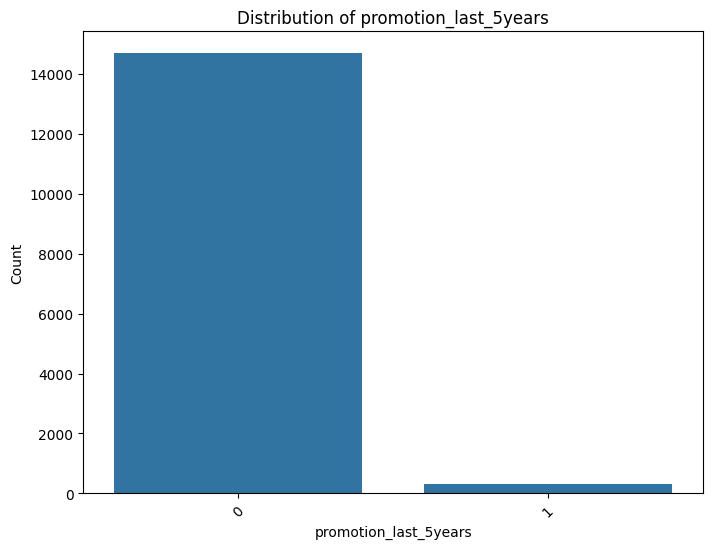

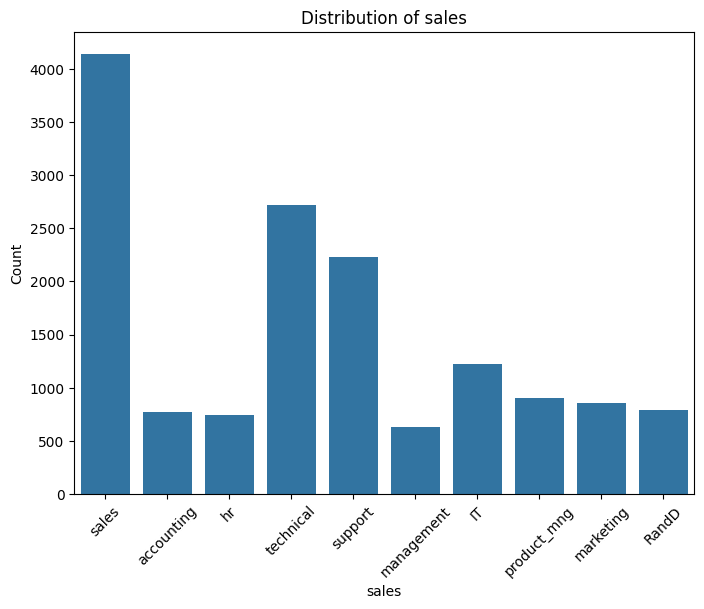

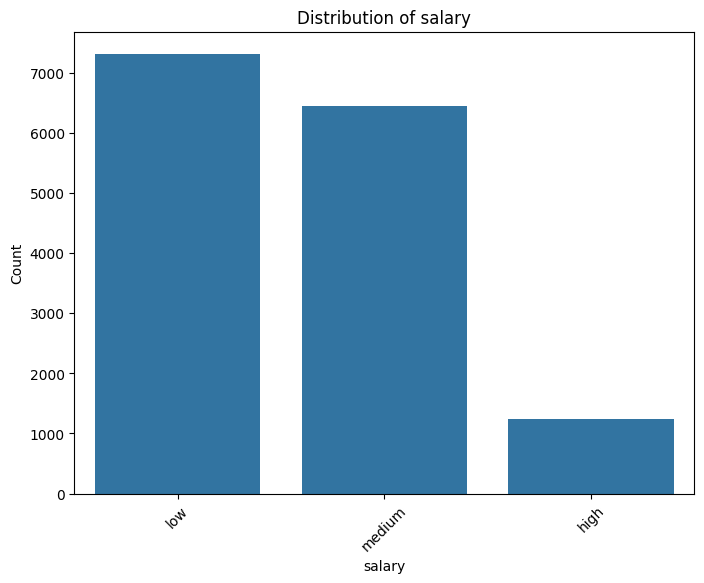

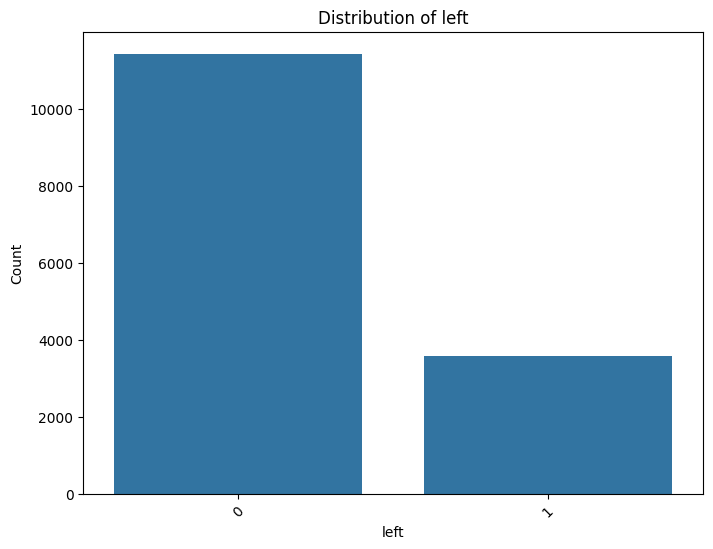

In [ ]:
categorical_features = ['Work_accident', 'promotion_last_5years', 'sales', 'salary', 'left']
for feature in categorical_features:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=feature, data=data)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.xticks(rotation=45)
  plt.show()

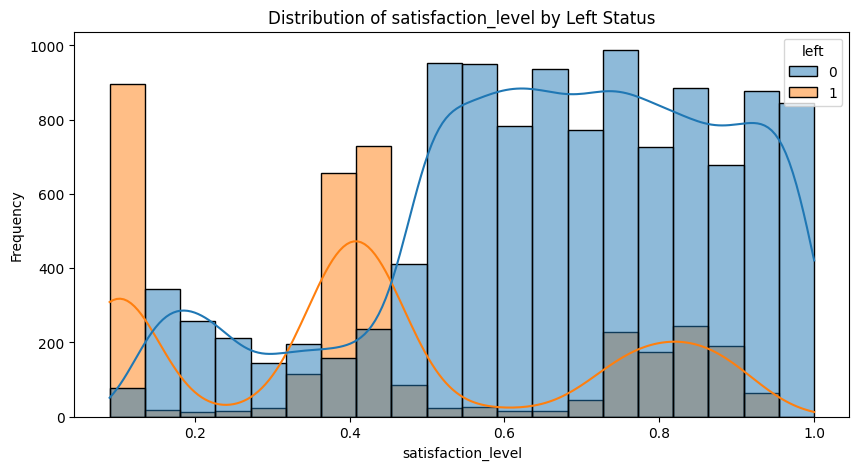

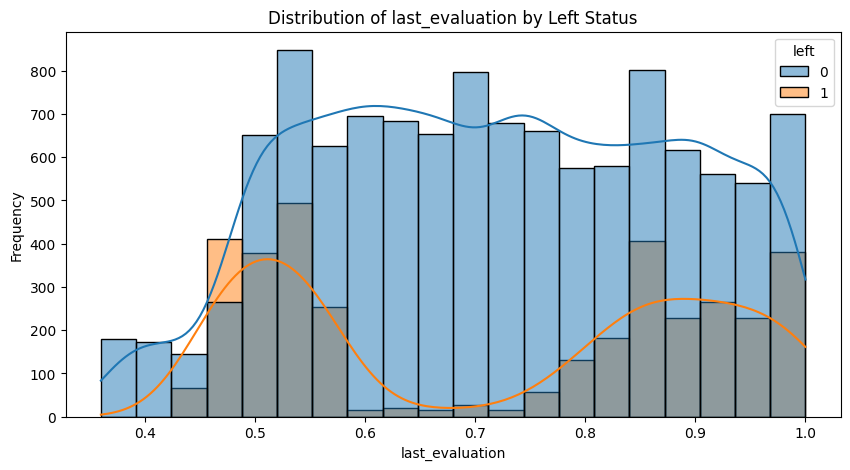

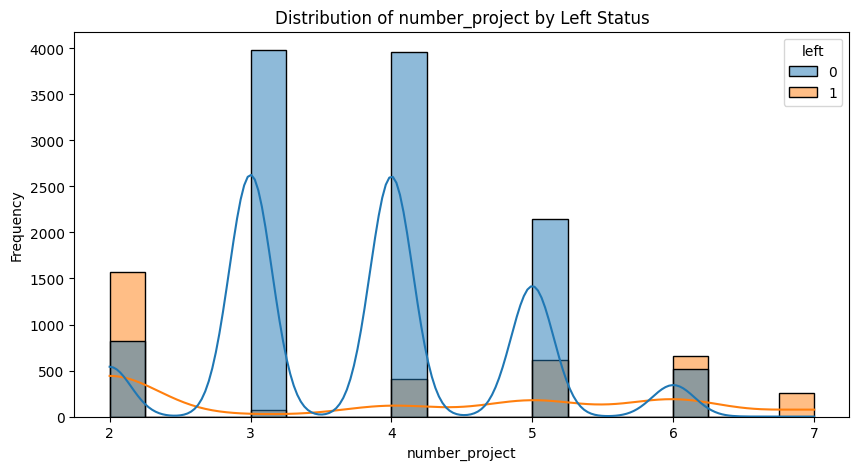

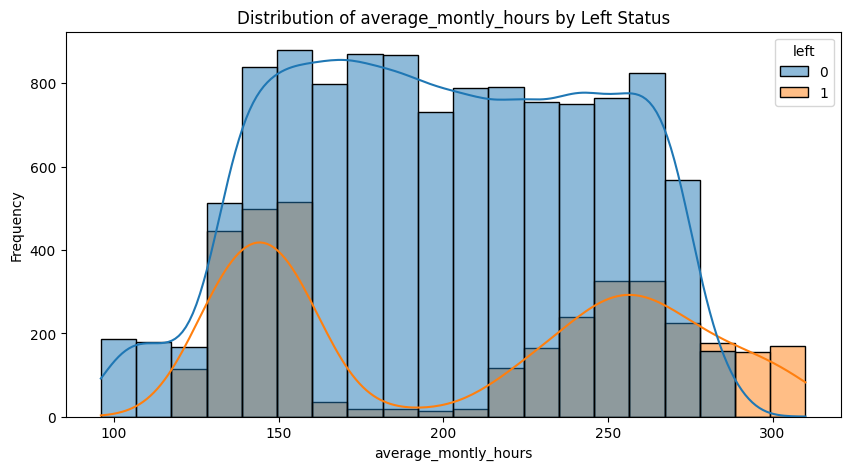

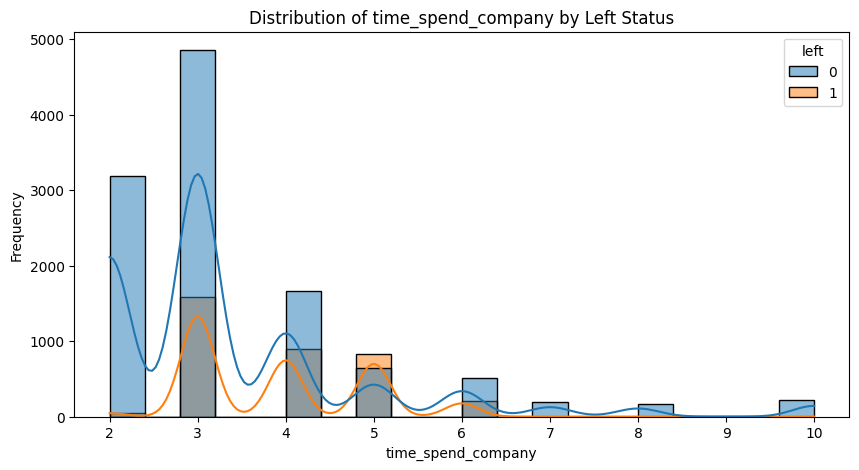

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x=feature, hue='left', bins=20, kde=True)
    plt.title(f'Distribution of {feature} by Left Status')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

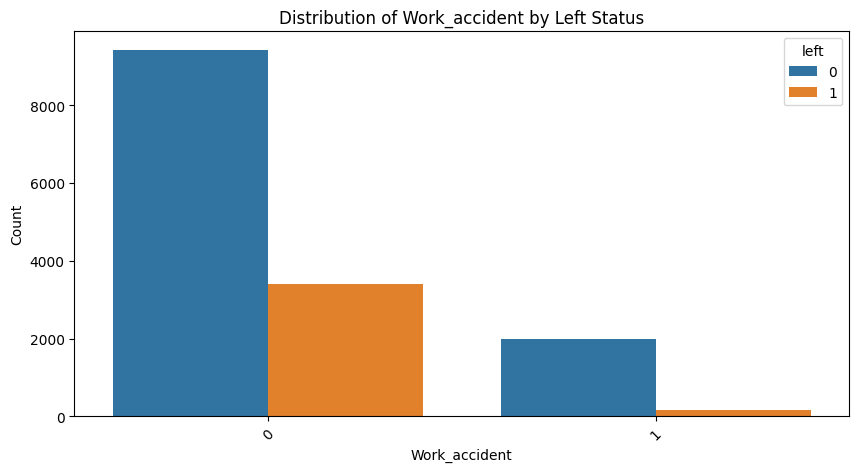

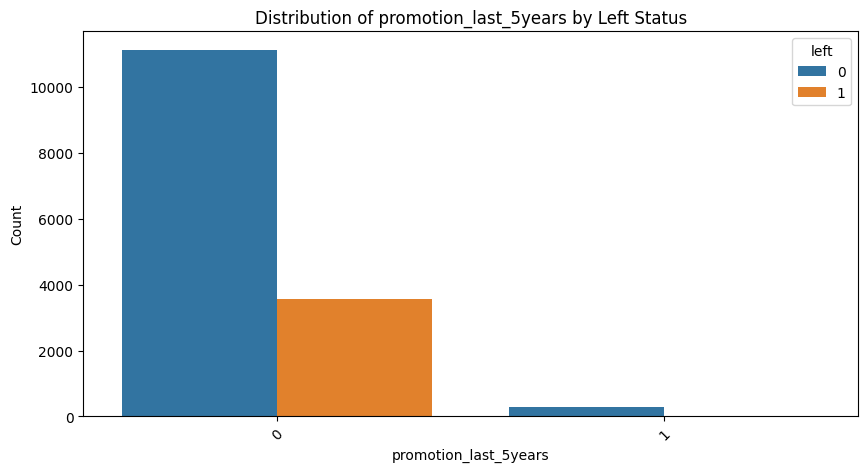

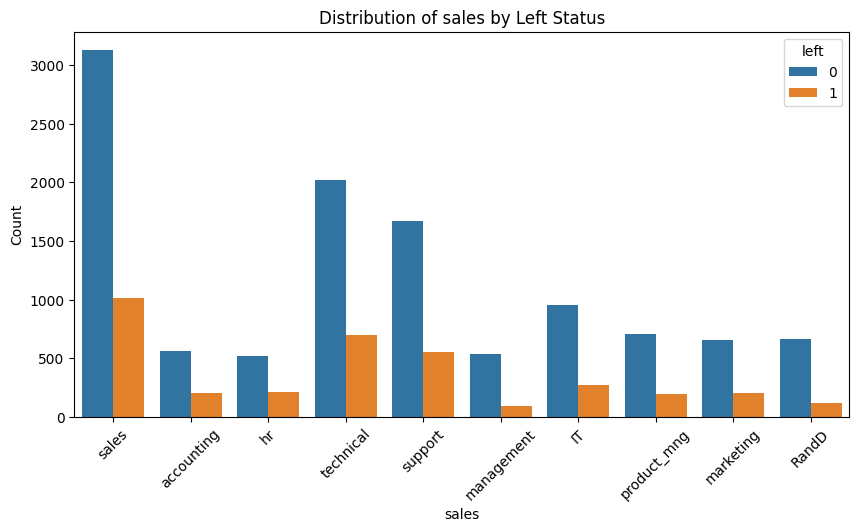

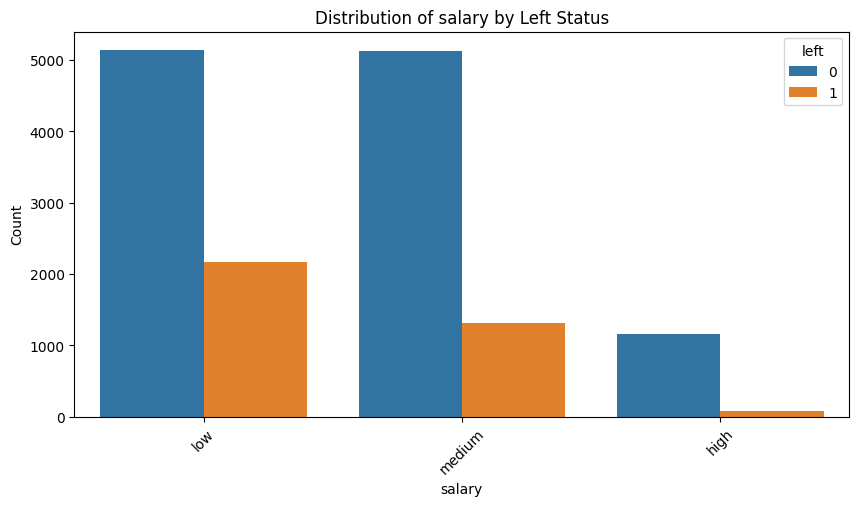

In [ ]:
for feature in categorical_features :
  if feature != 'left':
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=feature, hue='left')
    plt.title(f'Distribution of {feature} by Left Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
labelEncoder = LabelEncoder()
data['salary'] = labelEncoder.fit_transform(data['salary'])
data['sales'] = labelEncoder.fit_transform(data['sales'])

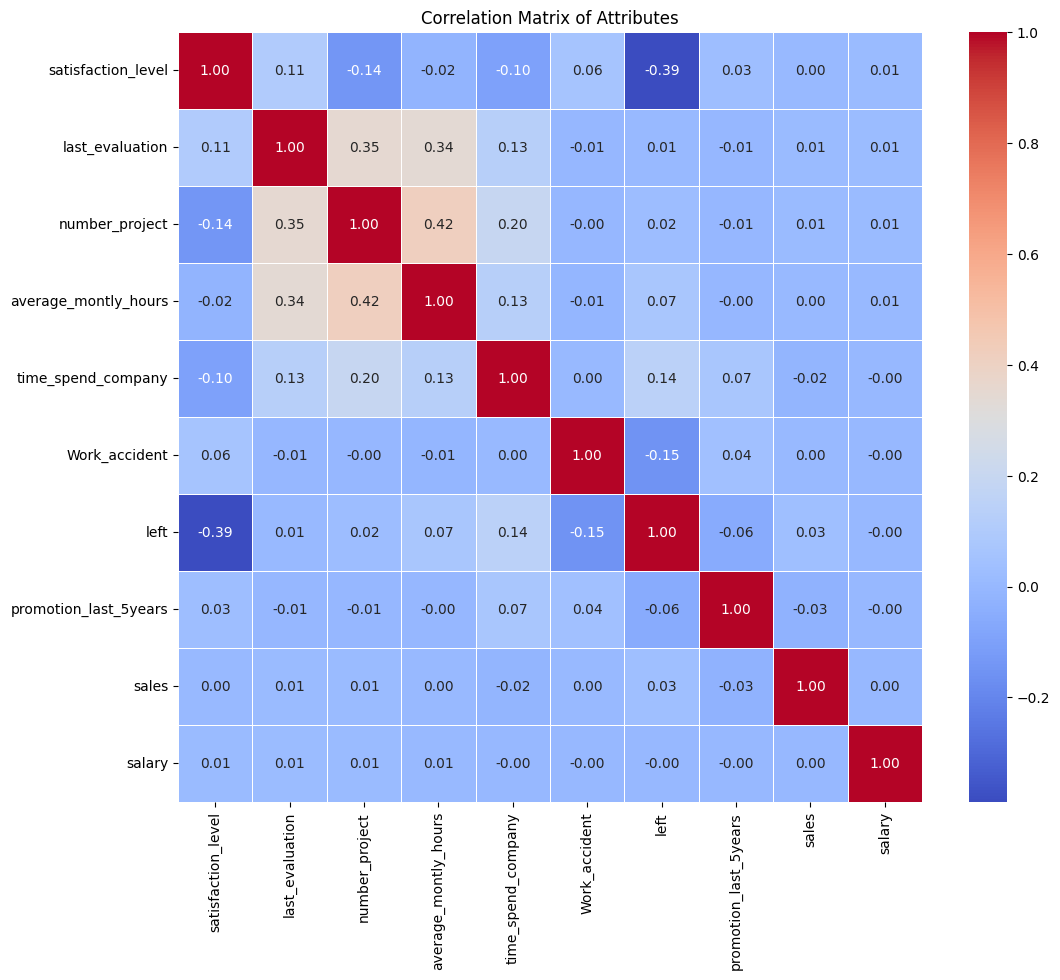

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Attributes')
plt.show()

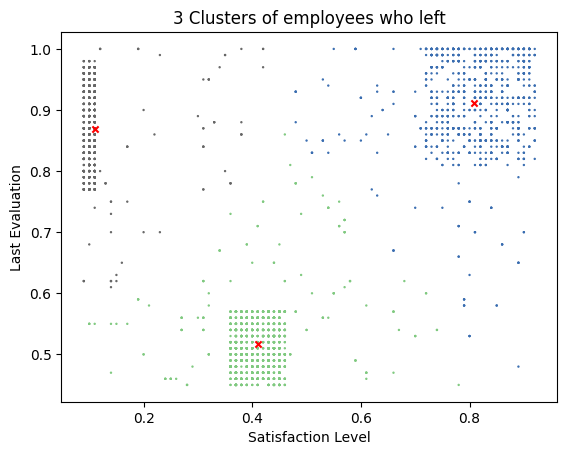

In [ ]:
leftEmp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(leftEmp)

leftEmp['label'] = kmeans.labels_

plt.scatter(leftEmp['satisfaction_level'], leftEmp['last_evaluation'], c=leftEmp['label'],cmap='Accent' , s=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='red', marker='x', label='Centroids' )
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

In [ ]:
X = data.drop('left', axis=1)
y = data['left']

In [ ]:
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(40 , 70 , 100), max_iter=200, learning_rate= 'invscaling' , activation='relu' , batch_size= 100 , random_state= 42 , verbose=True )
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.65161580
Iteration 2, loss = 0.58060164
Iteration 3, loss = 0.52886446
Iteration 4, loss = 0.50805583
Iteration 5, loss = 0.46104252
Iteration 6, loss = 0.43561766
Iteration 7, loss = 0.43586004
Iteration 8, loss = 0.39654305
Iteration 9, loss = 0.36660495
Iteration 10, loss = 0.37258204
Iteration 11, loss = 0.33229480
Iteration 12, loss = 0.34639210
Iteration 13, loss = 0.32150629
Iteration 14, loss = 0.29513948
Iteration 15, loss = 0.31996636
Iteration 16, loss = 0.30397338
Iteration 17, loss = 0.28932354
Iteration 18, loss = 0.29843755
Iteration 19, loss = 0.29885148
Iteration 20, loss = 0.26760644
Iteration 21, loss = 0.27165219
Iteration 22, loss = 0.28234901
Iteration 23, loss = 0.26467009
Iteration 24, loss = 0.25939230
Iteration 25, loss = 0.25309381
Iteration 26, loss = 0.26126125
Iteration 27, loss = 0.26611033
Iteration 28, loss = 0.24750125
Iteration 29, loss = 0.26162638
Iteration 30, loss = 0.25603399
Iteration 31, loss = 0.24973103
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=100, hidden_layer_sizes=(40, 70, 100),
              learning_rate='invscaling', random_state=42, verbose=True)

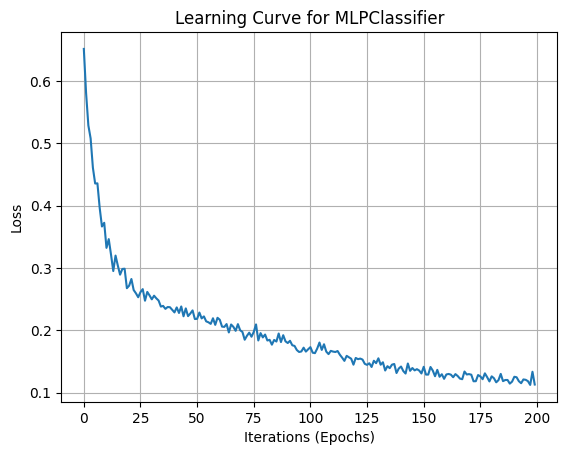

In [ ]:
plt.plot(mlp.loss_curve_)
plt.title('Learning Curve for MLPClassifier')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9619873291097032
Precision: 0.9424778761061947
Recall: 0.8949579831932774
F1 Score: 0.9181034482758621


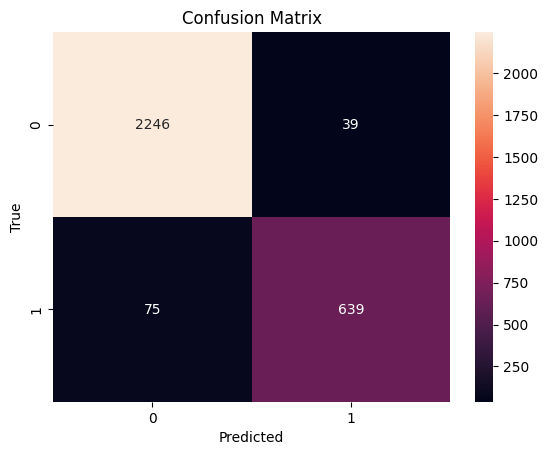

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()